@author: eveomett

# Final Project: MAUP and data.  See details on Canvas page

## Make sure to say where/when you got your data!

In [1]:
import pandas as pd
import geopandas as gpd
import maup
from maup import smart_repair
import time
import os

maup.progress.enabled = True

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
maup.progress.enabled = True

In [4]:
# Import and Explore the Data
start_time = time.time()
population_df = gpd.read_file("./ri_data/ri_pl2020_b/ri_pl2020_p2_b.shp")
end_time = time.time()
print("The time to import ri_pl2020_p2_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import ri_pl2020_p2_b.shp is: 0.05206645329793294 mins


In [5]:
start_time = time.time()
vap_df= gpd.read_file("./ri_data/ri_pl2020_b/ri_pl2020_p4_b.shp")
end_time = time.time()
print("The time to import ri_pl2020_p4_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import ri_pl2020_p4_b.shp is: 0.05169211626052857 mins


In [6]:
start_time = time.time()
vest20_df = gpd.read_file("./ri_data/ri_vest_20/ri_vest_20.shp")
end_time = time.time()
print("The time to import ri_vest_20.shp is:",
      (end_time-start_time)/60, "mins")

The time to import ri_vest_20.shp is: 0.0018500328063964845 mins


In [7]:
start_time = time.time()
vest18_df = gpd.read_file("./ri_data/ri_vest_18/ri_vest_18.shp")
end_time = time.time()
print("The time to import ri_vest_18.shp is:",
      (end_time-start_time)/60, "mins")

The time to import ri_vest_18.shp is: 0.0026931524276733398 mins


In [8]:
start_time = time.time()
county_df = gpd.read_file("./ri_data/ri_pl2020_cnty/ri_pl2020_cnty.shp")
end_time = time.time()
print("The time to import ri_pl2020_cnty.shp is:",
      (end_time-start_time)/60, "mins")

The time to import ri_pl2020_cnty.shp is: 0.00029525359471639 mins


In [9]:
start_time = time.time()
house_df = gpd.read_file("./ri_data/ri_sldl_adopted_2022/RI_House_D_SubA.shp")
end_time = time.time()
print("The time to import state house districts is:",
      (end_time-start_time)/60, "mins")

The time to import state house districts is: 0.0010271827379862467 mins


In [10]:
house_df.shape

(75, 4)

In [11]:
print(population_df.columns)
print(vap_df.columns)
print(vest18_df.columns)
print(vest20_df.columns)
print(county_df.columns)
print(house_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

In [12]:
print(house_df.head())

   ID DISTRICT  DISTRICTN                                           geometry
0   1        1          1  POLYGON ((-71.39259 41.83663, -71.39181 41.836...
1   2        2          2  POLYGON ((-71.39548 41.82762, -71.39548 41.828...
2   3        3          3  POLYGON ((-71.43307 41.84743, -71.43279 41.848...
3   4        4          4  POLYGON ((-71.41384 41.83481, -71.41487 41.836...
4   5        5          5  POLYGON ((-71.43045 41.83623, -71.43059 41.836...


In [13]:
district_col_name = "DISTRICT"

In [14]:
population_df = population_df.to_crs(population_df.estimate_utm_crs())
vap_df = vap_df.to_crs(vap_df.estimate_utm_crs())
county_df = county_df.to_crs(county_df.estimate_utm_crs())
house_df = house_df.to_crs(house_df.estimate_utm_crs())
vest18_df = vest18_df.to_crs(vest18_df.estimate_utm_crs())
vest20_df = vest20_df.to_crs(vest20_df.estimate_utm_crs())

In [15]:
maup.doctor(population_df)

100%|███████████████████████████████████| 25649/25649 [00:08<00:00, 2927.58it/s]


True

In [16]:
maup.doctor(vap_df)

100%|███████████████████████████████████| 25649/25649 [00:08<00:00, 2939.24it/s]


True

In [17]:
maup.doctor(county_df)

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 515.45it/s]


True

In [18]:
maup.doctor(house_df)

100%|██████████████████████████████████████████| 75/75 [00:00<00:00, 682.00it/s]


There are 152 overlaps.
There are 2342 holes.


False

In [19]:
maup.doctor(vest18_df)

100%|███████████████████████████████████████| 423/423 [00:00<00:00, 1332.33it/s]


True

In [20]:
maup.doctor(vest20_df)

100%|███████████████████████████████████████| 423/423 [00:00<00:00, 1345.04it/s]


True

In [21]:
# Perform smart repair
repaired_house_df = smart_repair(house_df)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|█████████████████████████████████████| 4768/4768 [00:01<00:00, 3599.46it/s]


Resolving overlaps...
Assigning order 2 pieces...
Filling gaps...


Gaps to fill: 100%|█████████████████████████████| 34/34 [00:01<00:00, 32.48it/s]


In [22]:
repaired_house_df = smart_repair(repaired_house_df, min_rook_length = 30)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|█████████████████████████████████████████| 76/76 [00:00<00:00, 3123.58it/s]


Resolving overlaps...
Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]


Converting small rook adjacencies to queen...


100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 2939.25it/s]


In [23]:
print(maup.doctor(repaired_house_df))

100%|██████████████████████████████████████████| 75/75 [00:00<00:00, 559.27it/s]


True


In [24]:
# Put data in same geometry units
blocks_to_precincts_assignment = maup.assign(population_df.geometry, vest20_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, vest20_df.geometry)

100%|███████████████████████████████████████| 423/423 [00:00<00:00, 6121.11it/s]


In [25]:
blocks_to_precincts_assignment

0         89
1        109
2        116
3        113
4         89
        ... 
25644     19
25645     31
25646     31
25647     14
25648     29
Length: 25649, dtype: int64

In [26]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [27]:
vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010', 'P0040011']

In [28]:
for name in pop_column_names:
    vest20_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    vest20_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

In [29]:
print(population_df['P0020001'].sum())
print(vest20_df['P0020001'].sum())
print(vap_df['P0040001'].sum())
print(vest20_df['P0040001'].sum())

1097379
1097379
887594
887594


In [30]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDREE': 'G20USSD', 
                                        'G20USSRWAT': 'G20USSR'}

In [31]:
vest20_df.columns

Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'GEOID20', 'NAME20', 'G20PREDBID',
       'G20PRERTRU', 'G20PRELJOR', 'G20PREOFUE', 'G20PREOLAR', 'G20PREOCAR',
       'G20PREOWRI', 'G20USSDREE', 'G20USSRWAT', 'G20USSOWRI', 'geometry',
       'P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007', 'P0020008',
       'P0020009', 'P0020010', 'P0020011', 'P0040001', 'P0040002', 'P0040005',
       'P0040006', 'P0040007', 'P0040008', 'P0040009', 'P0040010', 'P0040011'],
      dtype='object')

In [32]:
vest20_df.rename(columns=rename_dict, inplace = True)

In [33]:
vest20_df.columns

Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'GEOID20', 'NAME20', 'G20PRED',
       'G20PRER', 'G20PRELJOR', 'G20PREOFUE', 'G20PREOLAR', 'G20PREOCAR',
       'G20PREOWRI', 'G20USSD', 'G20USSR', 'G20USSOWRI', 'geometry', 'TOTPOP',
       'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI',
       'NH_OTHER', 'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP',
       'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')

In [34]:
vest20_df.drop(columns=['G20PRELJOR','G20PREOLAR','G20PREOCAR','G20PREOWRI','G20PREOFUE','G20USSOWRI'], inplace=True)
vest20_df.columns

Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'GEOID20', 'NAME20', 'G20PRED',
       'G20PRER', 'G20USSD', 'G20USSR', 'geometry', 'TOTPOP', 'HISP',
       'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER',
       'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP',
       'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')

In [35]:
vap_df.rename(columns=rename_dict, inplace = True)

In [36]:
blocks_to_2018precincts_assignment = maup.assign(population_df.geometry, vest18_df.geometry)

100%|███████████████████████████████████████| 423/423 [00:00<00:00, 6061.46it/s]


In [37]:
weights2018 = vap_df["VAP"]/blocks_to_2018precincts_assignment.map(vap_df["VAP"].groupby(blocks_to_2018precincts_assignment).sum())
weights2018 = weights2018.fillna(0)

In [42]:
elec2018_cols = ['G18USSDWHI', 'G18USSRFLA', 'G18USSOWRI', 'G18GOVDRAI', 'G18GOVRFUN', 
                 'G18GOVITRI', 'G18GOVIMUN', 'G18GOVOGIL', 'G18GOVOARM', 'G18GOVOWRI', 
                 'G18LTGDMCK', 'G18LTGRPEN', 'G18LTGIRIC', 'G18LTGIMCC', 'G18LTGOHEL', 
                 'G18LTGOWRI', 'G18ATGDNER', 'G18ATGOGOR', 'G18ATGOWRI', 'G18TREDMAG', 
                 'G18TRERRIL', 'G18TREOWRI', 'G18SOSDGOR', 'G18SOSRCOR', 'G18SOSOWRI']
prorated2018 = maup.prorate(blocks_to_2018precincts_assignment, vest18_df[elec2018_cols], weights2018)
vest20_df[elec2018_cols] = prorated2018
vest20_df.head()

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,NAME20,G20PRED,G20PRER,G20USSD,G20USSR,geometry,...,G18LTGOWRI,G18ATGDNER,G18ATGOGOR,G18ATGOWRI,G18TREDMAG,G18TRERRIL,G18TREOWRI,G18SOSDGOR,G18SOSRCOR,G18SOSOWRI
0,44,009,443208,44009443208,South Kingstown 8,1562,839,1615,762,"POLYGON ((282137.751 4587999.409, 282184.655 4...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,44,007,440724,44007440724,Cranston 24,1322,290,1310,271,"POLYGON ((300198.309 4627393.802, 300267.466 4...",...,0.162355,11.898305,2.922391,0.162355,10.297948,5.752007,0.000000,11.156111,4.986619,0.000000
2,44,005,ZZZZZZ,44005ZZZZZZ,Voting Districts Not Defined,0,0,0,0,"POLYGON ((289927.971 4575956.908, 290181.441 4...",...,0.030381,16.967899,4.466036,0.273431,15.220980,8.096589,0.015191,16.572944,7.078819,0.000000
3,44,005,441501,44005441501,JAMESTOWN 1,1547,651,1621,564,"POLYGON ((301064.263 4603033.208, 301072.860 4...",...,0.138402,33.677915,10.933789,0.692012,26.988466,21.313968,0.000000,29.525844,19.376335,0.046134
4,44,005,441502,44005441502,JAMESTOWN 2,1261,562,1344,464,"POLYGON ((297695.539 4591433.718, 298103.867 4...",...,0.022406,6.721792,1.428381,0.067218,5.192585,3.837023,0.005601,5.674313,3.288077,0.000000


In [43]:
precincts_to_districts_assignment = maup.assign(vest20_df.geometry, repaired_house_df.geometry)
vest20_df["SEND"] = precincts_to_districts_assignment

100%|██████████████████████████████████████████| 75/75 [00:00<00:00, 205.73it/s]


In [44]:
precincts_to_districts_assignment

0      34
1      18
2      74
3      73
4      73
       ..
418     8
419     5
420    12
421     5
422     5
Length: 423, dtype: int64

In [45]:
print(set(vest20_df["SEND"]))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74}


In [46]:
repaired_house_df

,ID,DISTRICT,DISTRICTN,geometry
0,1,1,1,"POLYGON ((299772.274 4633536.190, 299760.291 4..."
1,2,2,2,"POLYGON ((299760.291 4633538.638, 299772.274 4..."
2,3,3,3,"POLYGON ((299260.151 4633950.305, 299260.151 4..."
3,4,4,4,"POLYGON ((300325.685 4636660.699, 300325.685 4..."
4,5,5,5,"POLYGON ((298193.849 4634449.249, 298189.251 4..."
...,...,...,...,...
70,71,71,71,"POLYGON ((314772.850 4615066.348, 314797.632 4..."
71,72,72,72,"POLYGON ((309328.559 4607394.626, 309328.559 4..."
72,73,73,73,"POLYGON ((308971.366 4595895.962, 309075.084 4..."
73,74,74,74,"POLYGON ((301030.608 4608413.659, 301048.676 4..."


In [48]:
for precinct_index in range(len(vest20_df)):
    #print(sen_df.at[45, district_col_name])
    #print(final_df.at[precinct_index, "SEND"])
    vest20_df.at[precinct_index, "SEND"] = repaired_house_df.at[int(vest20_df.at[precinct_index, "SEND"]), district_col_name]
print(set(repaired_house_df[district_col_name]))
print(set(vest20_df["SEND"]))

{'30', '74', '45', '67', '55', '24', '53', '38', '33', '40', '49', '61', '32', '75', '27', '4', '47', '43', '69', '18', '19', '58', '28', '50', '65', '70', '73', '31', '15', '25', '59', '48', '6', '10', '60', '21', '17', '64', '72', '9', '2', '5', '36', '7', '26', '52', '29', '42', '54', '68', '20', '8', '34', '71', '11', '22', '1', '66', '23', '35', '37', '56', '57', '39', '41', '46', '12', '62', '44', '13', '63', '51', '14', '16', '3'}
{'30', '74', '45', '67', '55', '24', '53', '38', '33', '40', '61', '49', '32', '75', '27', '4', '47', '43', '69', '18', '19', '58', '50', '70', '28', '73', '31', '15', '59', '25', '48', '6', '60', '10', '21', '17', '64', '72', '9', '36', '5', '2', '7', '52', '54', '42', '68', '26', '29', '20', '71', '34', '8', '11', '22', '1', '66', '23', '35', '3', '56', '37', '41', '39', '46', '62', '12', '63', '13', '44', '65', '14', '16', '57', '51'}


In [49]:
vest20_df.columns

Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'GEOID20', 'NAME20', 'G20PRED',
       'G20PRER', 'G20USSD', 'G20USSR', 'geometry', 'TOTPOP', 'HISP',
       'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER',
       'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP',
       'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'G18USSDWHI', 'G18USSRFLA',
       'G18USSOWRI', 'G18GOVDRAI', 'G18GOVRFUN', 'G18GOVITRI', 'G18GOVIMUN',
       'G18GOVOGIL', 'G18GOVOARM', 'G18GOVOWRI', 'G18LTGDMCK', 'G18LTGRPEN',
       'G18LTGIRIC', 'G18LTGIMCC', 'G18LTGOHEL', 'G18LTGOWRI', 'G18ATGDNER',
       'G18ATGOGOR', 'G18ATGOWRI', 'G18TREDMAG', 'G18TRERRIL', 'G18TREOWRI',
       'G18SOSDGOR', 'G18SOSRCOR', 'G18SOSOWRI', 'SEND'],
      dtype='object')

<Axes: >

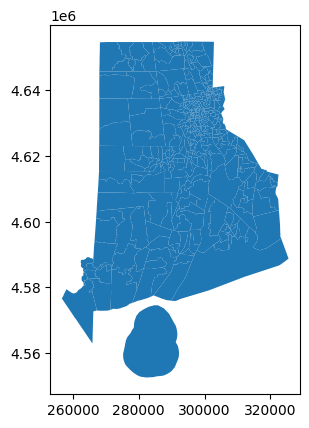

In [50]:
vest20_df.plot()

In [51]:
pop_vals = [vest20_df.loc[vest20_df["SEND"] == str(n), "TOTPOP"].sum() for n in range(1, 46)]
print(pop_vals)

[15214, 14205, 15042, 14131, 15462, 15320, 15985, 14922, 14396, 14835, 15319, 15612, 14957, 15298, 14081, 15050, 14602, 13688, 13990, 14104, 16072, 13785, 13454, 14263, 14390, 13938, 15229, 14960, 12975, 15699, 15122, 14562, 13972, 13642, 15299, 14551, 14733, 14014, 13944, 15494, 14691, 14770, 14220, 14827, 14963]


In [42]:
directory = "./RI"
if not os.path.exists(directory):
    os.makedirs(directory)
vest20_df.to_file("./RI/RI.shp")